In [ ]:
#@title
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from itertools import cycle, islice
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

import pandas as pd
url='https://drive.google.com/file/d/1gaIcD-pRpyVBKBDc4EKDtxL8lEQBoL-c/view?usp=sharing'#'https://drive.google.com/file/d/1r5hIobc8IGjE032nEbaRa4EDCTkRpbjx/view?usp=sharing'#'https://drive.google.com/file/d/1VzPynjiVT3IHpG_mkVN5_mrAsl4hYtiq/view?usp=sharing'#'https://drive.google.com/file/d/1jGlI4Ccx09SFRZLb35OMPFf5UHuTznZQ/view?usp=sharing'#'https://drive.google.com/file/d/1WKL5Jycmog-SfCbS5aHZQWNC5FgJ2qQK/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2)
#df = pd.read_csv("/content/df.csv")
def clean_currency(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('$', '').replace(',', ''))
    return(x)
df = df.drop(['repo_fullname'], axis=1)
for col in df.columns:
    df[col] = df[col].apply(clean_currency).astype('float')
df.to_csv('df.csv')     
#df_new = VarianceThreshold().fit_transform(df.fillna(0))
df=df.fillna(0)
to_drop=[]
for i in df.columns:
    if df[i].var()==0:
        to_drop.append(i)
print(to_drop)
df=df.drop(to_drop, axis=1)
df = df.sample(frac=1, random_state=111).reset_index(drop=True)#[:-1]
splits=10
#df=pd.read_csv('truedf.csv')
N=len(df)
Xs=[]
scalers=[]
for i in range(splits):
    dff=df[i*N//splits:(i+1)*N//splits]
    scaler=MinMaxScaler().fit(dff.fillna(0).to_numpy())
    Xs.append(scaler.transform(dff.fillna(0).to_numpy()))    
    scalers.append(scaler)
#X=MinMaxScaler().fit_transform(df.fillna(0).to_numpy())



['commits_avg_per_day', 'forks_avg_per_day', 'issues_avg_closing_time', 'issues_avg_comment_time', 'pulls_avg_closing_time', 'pulls_avg_created_per_day', 'releases_avg_downloads_per_day', 'wf_avg_successes_per_day']


In [ ]:
for i, col in enumerate(df.columns, 1):
    print(i,'&',col)

1 & commits_avg_added
2 & commits_avg_files_changed
3 & commits_avg_message_length
4 & commits_avg_per_day_real
5 & commits_avg_removed
6 & commits_count
7 & commits_days_since_first
8 & commits_days_since_last
9 & commits_max_per_day
10 & commits_total_lines_added
11 & commits_total_lines_removed
12 & contributors_count
13 & contributors_top_avg_additions
14 & contributors_top_avg_commits
15 & contributors_top_avg_deletions
16 & contributors_top_avg_participation_week
17 & forks_avg_max_per_day
18 & forks_count
19 & issues_avg_body_length
20 & issues_avg_comment_length
21 & issues_avg_comments
22 & issues_avg_labels
23 & issues_avg_per_day
24 & issues_avg_per_day_real
25 & issues_avg_title_length
26 & issues_count
27 & issues_labels
28 & issues_max_per_day
29 & issues_open
30 & issues_total_comments
31 & pulls_avg_body_length
32 & pulls_avg_comments
33 & pulls_avg_Commits
34 & pulls_avg_created_per_day_real
35 & pulls_avg_files_changed
36 & pulls_avg_labels
37 & pulls_avg_lines_added


In [ ]:
dftrue = pd.read_csv(url2)

for col in df.columns[1:]:
    dftrue[col] = dftrue[col].apply(clean_currency).astype('float')    
#df_new = VarianceThreshold().fit_transform(df.fillna(0))
dftrue=dftrue.fillna(0)
to_drop=[]
for i in dftrue.columns[1:]:
    if dftrue[i].var()==0:
        to_drop.append(i)
print(to_drop)
dftrue=dftrue.drop(to_drop, axis=1)
dftrue = dftrue.sample(frac=1, random_state=111).reset_index(drop=True)#[:-1]
#dftrue = dftrue.drop(['repo_fullname'], axis=1)
if dftrue.iloc[:,1:].equals(df):
    dftrue.to_csv('dfture.csv', index=False)

['commits_avg_per_day', 'forks_avg_per_day', 'issues_avg_closing_time', 'issues_avg_comment_time', 'pulls_avg_closing_time', 'pulls_avg_created_per_day', 'releases_avg_downloads_per_day', 'wf_avg_successes_per_day']


In [ ]:
#@title
from sklearn.metrics import davies_bouldin_score
import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
import operator

dbsc= [[0 for i in range(3)] for j in range(len(Xs))]
km = [[0 for i in range(3)] for j in range(len(Xs))]
spec = [[0 for i in range(3)] for j in range(len(Xs))]
dbscv= [[0 for i in range(3)] for j in range(len(Xs))]
kmv = [[0 for i in range(3)] for j in range(len(Xs))]
specv = [[0 for i in range(3)] for j in range(len(Xs))]
for i, X in enumerate(Xs):
    #X = MinMaxScaler().fit_transform(df)
    #from jqmcvi import base
    s_score = []
    ch_score = []
    dunn_score = []
    db_score = []
    epss = [x / 100.0 for x in range(75, 240, 5)]
    #for i in range():
    for eps in epss:
        db = DBSCAN(eps=eps).fit(X)
        #kmeanModel = kmeanModel.fit(X)
        labels = db.labels_
        try:
            score = metrics.silhouette_score(X, labels, metric='euclidean')
            s_score.append(score)
        except: 
            try:
                s_score.append(score)
            except: pass    
        try:  
            score = metrics.calinski_harabasz_score(X, labels)   
            ch_score.append(score)
            db_score.append(metrics.davies_bouldin_score(X, labels))
        except: pass    
        #dunn_score.append(base.dunn())
    
    index, value = max(enumerate(s_score), key=operator.itemgetter(1))       
    dbsc[i][0] = epss[index]
    dbscv[i][0] = [s_score[index], ch_score[index], db_score[index]]
    index, value = max(enumerate(ch_score), key=operator.itemgetter(1)) 
    dbsc[i][1] = epss[index]
    dbscv[i][1] = [s_score[index], ch_score[index], db_score[index]]
    index, value = min(enumerate(db_score), key=operator.itemgetter(1)) 
    dbsc[i][2] = epss[index]
    dbscv[i][2] = [s_score[index], ch_score[index], db_score[index]]
print('done')
for i, X in enumerate(Xs):
    from sklearn.metrics import davies_bouldin_score
    import sklearn
    from sklearn import metrics
    from sklearn.cluster import KMeans

    import numpy as np

    from sklearn.cluster import DBSCAN
    from sklearn import metrics
    from sklearn.datasets import make_blobs
    from sklearn.preprocessing import MinMaxScaler

    #X = MinMaxScaler().fit_transform(df)

    s_score = []
    ch_score = []
    db_score = []
    #for i in range():
    K = range(2,11)
    #for i in range():
    for k in K:
        kmeanModel = KMeans(n_clusters=k, random_state=0)
        kmeanModel = kmeanModel.fit(X)
        labels = kmeanModel.labels_
        score = metrics.silhouette_score(X, labels, metric='euclidean')
        s_score.append(score)    
        score = metrics.calinski_harabasz_score(X, labels)   
        ch_score.append(score)
        db_score.append(metrics.davies_bouldin_score(X, labels))
    index, value = max(enumerate(s_score), key=operator.itemgetter(1))       
    km[i][0] = K[index]
    kmv[i][0] = [s_score[index], ch_score[index], db_score[index]]
    index, value = max(enumerate(ch_score), key=operator.itemgetter(1)) 
    km[i][1] = K[index]
    kmv[i][1] = [s_score[index], ch_score[index], db_score[index]]
    index, value = min(enumerate(db_score), key=operator.itemgetter(1)) 
    km[i][2] = K[index]
    kmv[i][2] = [s_score[index], ch_score[index], db_score[index]]
print('done')
for i, X in enumerate(Xs):
    from sklearn.metrics import davies_bouldin_score
    import sklearn
    from sklearn import metrics
    from sklearn.cluster import KMeans
    import numpy as np

    from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift
    from sklearn import metrics
    from sklearn.datasets import make_blobs
    from sklearn.preprocessing import MinMaxScaler

    #X = MinMaxScaler().fit_transform(df)
    #from jqmcvi import base
    s_score = []
    ch_score = []
    dunn_score = []
    db_score = []
    epss = [x for x in range(2, 11, 1)]
    #for i in range():
    for eps in epss:
        db = SpectralClustering(n_clusters=eps, random_state=0).fit(X)
        #kmeanModel = kmeanModel.fit(X)
        labels = db.labels_
        try:
            score = metrics.silhouette_score(X, labels, metric='euclidean')
            s_score.append(score)
        except: 
            try:
                s_score.append(score)
            except: pass    
        try:  
            score = metrics.calinski_harabasz_score(X, labels)   
            ch_score.append(score)
            db_score.append(metrics.davies_bouldin_score(X, labels))
        except: pass    
        #dunn_score.append(base.dunn())
    index, value = max(enumerate(s_score), key=operator.itemgetter(1))       
    spec[i][0] = epss[index]
    specv[i][0] = [s_score[index], ch_score[index], db_score[index]]
    index, value = max(enumerate(ch_score), key=operator.itemgetter(1)) 
    spec[i][1] = epss[index]
    specv[i][1] = [s_score[index], ch_score[index], db_score[index]]
    index, value = min(enumerate(db_score), key=operator.itemgetter(1)) 
    spec[i][2] = epss[index]
    specv[i][2] = [s_score[index], ch_score[index], db_score[index]]

done
done


In [ ]:
newXs=[]
for i in range(len(dbsc)):
    print('set', i+1, ':\n', 'dbscan:', dbsc[i], dbscv[i], 'k:', km[i], kmv[i], 'spec:', spec[i], specv[i])
    dbsc[i]=list(set(dbsc[i]))
    km[i]=list(set(km[i]))
    spec[i]=list(set(spec[i]))
    #dbscv[i]=list(set(dbscv[i]))
    #kmv[i]=list(set(kmv[i]))
    #specv[i]=list(set(specv[i]))
for i, X in enumerate(Xs):
    newX = pd.DataFrame(data=X, columns=df.columns)
    for j in dbsc[i]:
        db=DBSCAN(eps=j).fit(X)
        newX['DBSCAN eps={} labels'.format(j)]=db.labels_
    for j in km[i]:
        kmeans=KMeans(n_clusters=j, random_state=0).fit(X)
        newX['{}-Means labels'.format(j)]=kmeans.labels_
    for j in spec[i]:
        sc=SpectralClustering(n_clusters=j, random_state=0).fit(X)    
        newX['Spectral k={} labels'.format(j)]=sc.labels_
    newXs.append(newX)    
    #print(newX)

set 1 :
 dbscan: [2.25, 1.25, 2.25] [[0.36324382717882187, 6.882671743669479, 1.3662285997957333], [0.11919333104611173, 12.579535178318329, 2.623537442631377], [0.36324382717882187, 6.882671743669479, 1.3662285997957333]] k: [2, 2, 7] [[0.23816548142902128, 27.769276674555595, 1.7182634284412475], [0.23816548142902128, 27.769276674555595, 1.7182634284412475], [0.1899315580849196, 14.602103971263752, 1.5418043997629713]] spec: [2, 2, 10] [[0.23263224847747643, 26.562626415844594, 1.7356358356019106], [0.23263224847747643, 26.562626415844594, 1.7356358356019106], [0.14767542299842332, 4.554375238183642, 0.9065991779858902]]
set 2 :
 dbscan: [2.35, 1.3, 2.35] [[0.3736760074664484, 4.960360115034516, 1.3603312563198062], [0.13405373909999022, 12.143961004668805, 3.2116462650739273], [0.3736760074664484, 4.960360115034516, 1.3603312563198062]] k: [2, 2, 10] [[0.21885549936913215, 28.331001624543465, 1.7396827619010249], [0.21885549936913215, 28.331001624543465, 1.7396827619010249], [0.1350

In [ ]:
import pandas as pd
import numpy as np
labelss=[]
for i, newX in enumerate(newXs):
    labels=newX.iloc[:,-(len(newX.columns)-len(df.columns)):].replace(-1, np.nan).to_numpy()
    labelss.append(labels)
#print(labels)    
#df = pd.read_csv('newdata.csv')
#labels=df.iloc[:,-4:].replace(-1, np.nan).to_numpy()
#labels=labels[:,:-1]

In [ ]:
!pip install ClusterEnsembles

     |████████████████████████████████| 38.1 MB 296 kB/s 
     |████████████████████████████████| 1.1 MB 39.2 MB/s 
     |████████████████████████████████| 297 kB 41.7 MB/s 
  Created wheel for pymetis: filename=PyMetis-2020.1-cp37-cp37m-linux_x86_64.whl size=278360 sha256=70d79658d5692f86d3a1f04dfa56e9f1f0dae319707b43ffdc2165ecb3ff48ea
  Stored in directory: /root/.cache/pip/wheels/fc/6a/69/a4296ff80443cd9b3876eaea9bd8dfeed30cc8443708848097
Successfully built pymetis
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import ClusterEnsembles as CE 
label_ces=[]

for i, labels in enumerate(labelss):
    #sys.stdout = open('file', 'w')
    for j in range(2,3):
        label_ce = CE.cluster_ensembles(labels.T, nclass=j, solver='all', random_state=0, verbose=True)
        loc=-(len(newXs[i].columns)-len(df.columns))
        newXs[i].insert(len(newXs[i].iloc[:,:loc].columns), 'labels', label_ce)
    label_ces.append(label_ce)
    print('-------------------------------------------------------------------------------------------------------------------------------------------')

#df['Consensus']=label_ce
#df.to_csv('cons.scv')

Cluster Ensembles
    - Number of classes: 2
    - Solver: all
    - Length of labels: 97
    - Number of labels: 6
    - ANMI:
        - hgpa : 0.6195823728172948
        - mcla : 0.2613308378741936
        - hbgf : 0.7862986246389755
        - cspa : 0.4650517821267901
        - nmf : 0.6218557634007434
    - Best solver: hbgf
-------------------------------------------------------------------------------------------------------------------------------------------
Cluster Ensembles
    - Number of classes: 2
    - Solver: all
    - Length of labels: 97
    - Number of labels: 5
    - ANMI:
        - hgpa : 1.2814147132630898
        - mcla : 0.7038123375857183
        - hbgf : 0.8983121054930553
        - cspa : 0.7038123375857184
        - nmf : 0.7038123375857183
    - Best solver: hgpa
-------------------------------------------------------------------------------------------------------------------------------------------
Cluster Ensembles
    - Number of classes: 2
    - Solver:

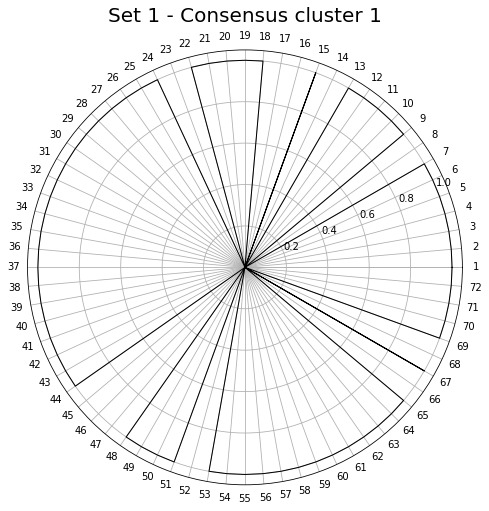

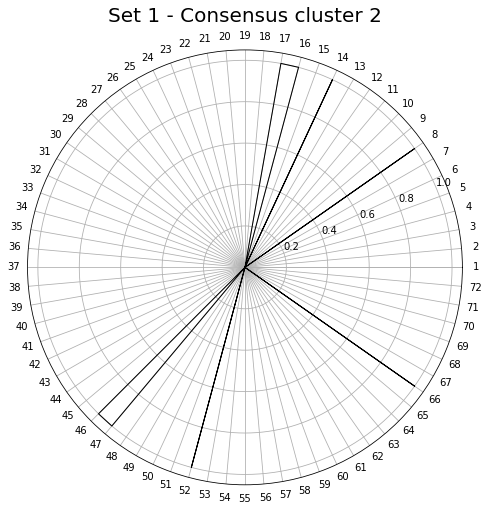

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1.])
array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.])


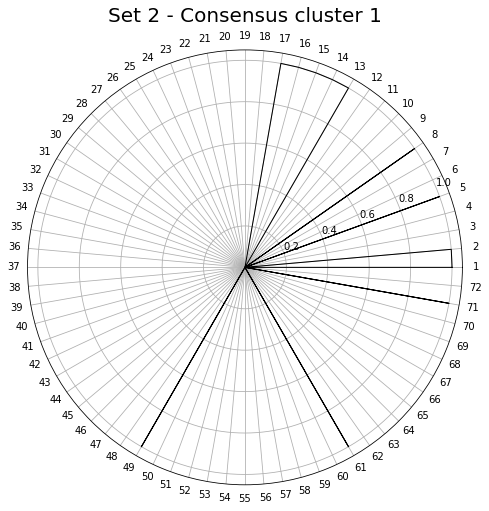

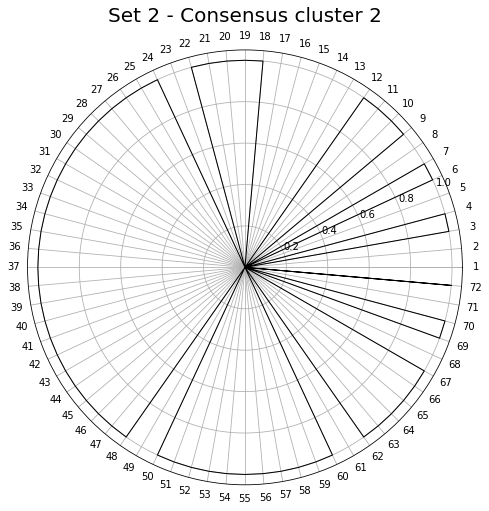

array([1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1.])
array([0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0.])


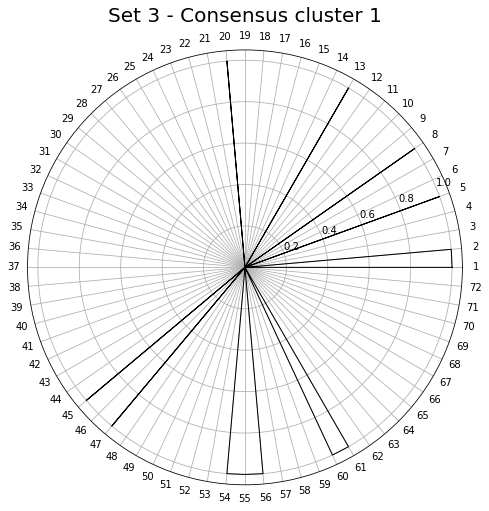

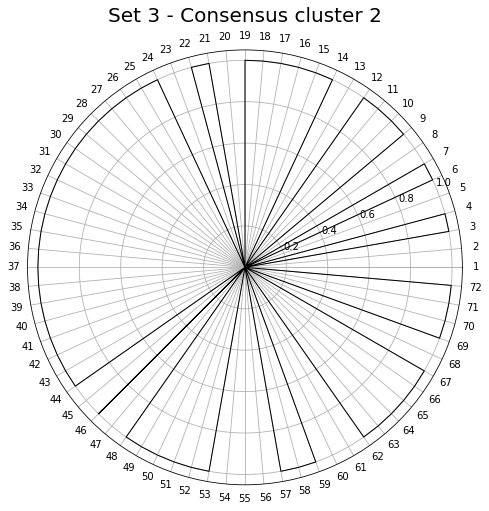

array([1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.])
array([0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0.])


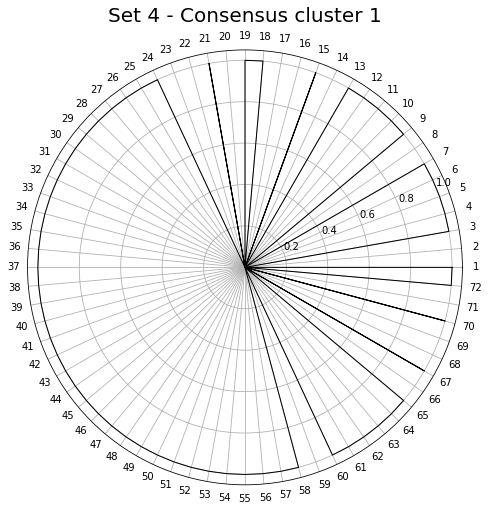

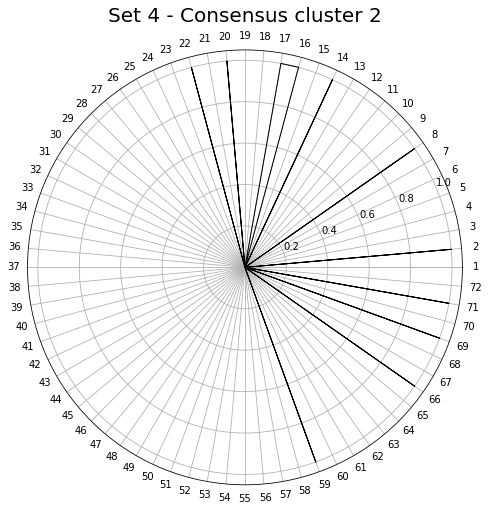

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 1., 1.])
array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 0.])


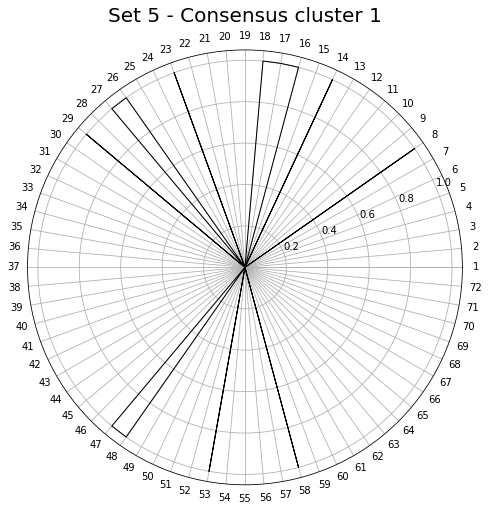

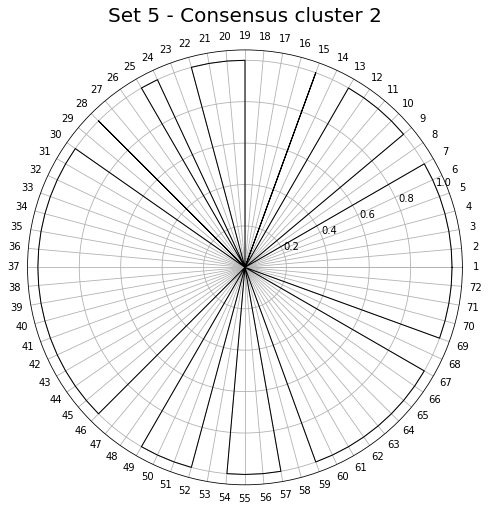

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])
array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1.])


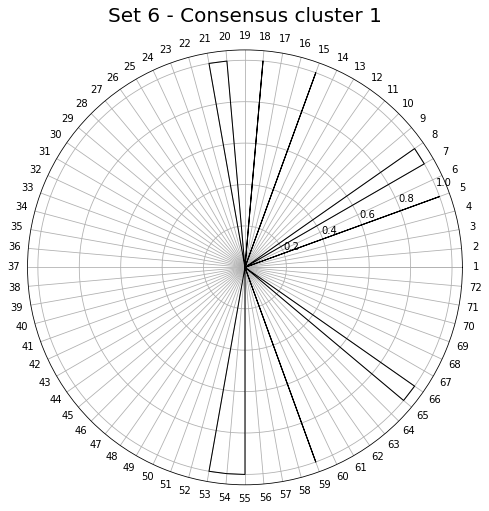

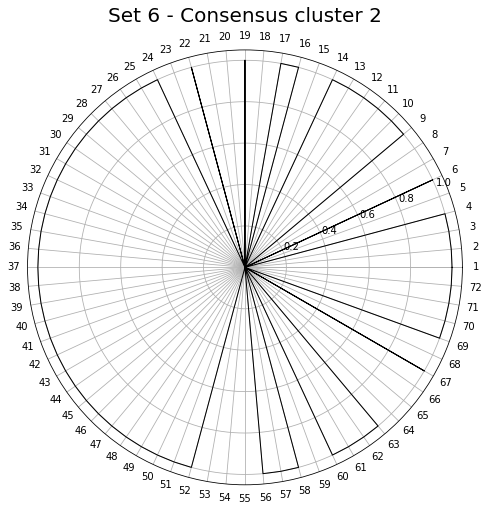

array([0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.])
array([1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 1., 1.])


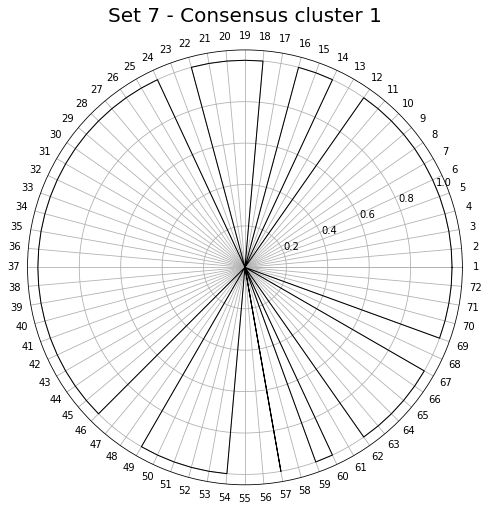

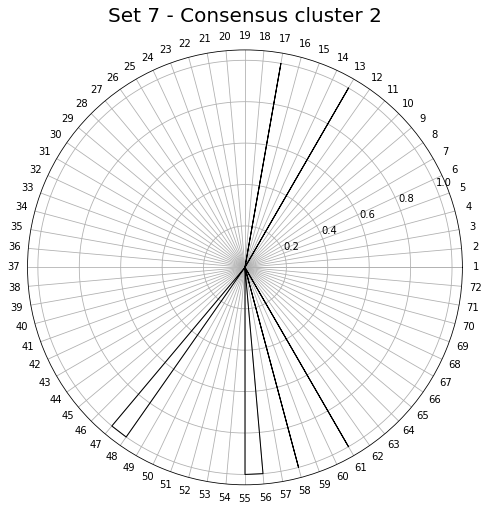

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1.])
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])


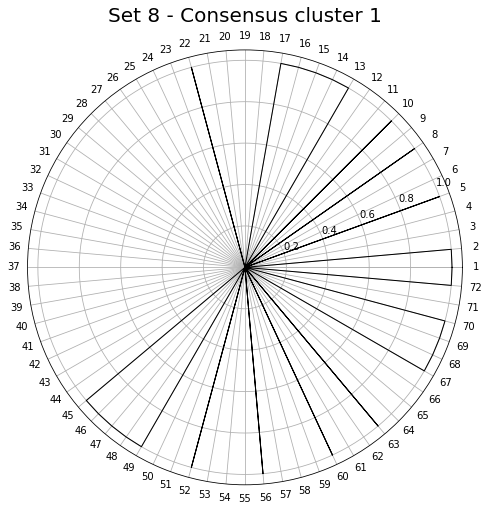

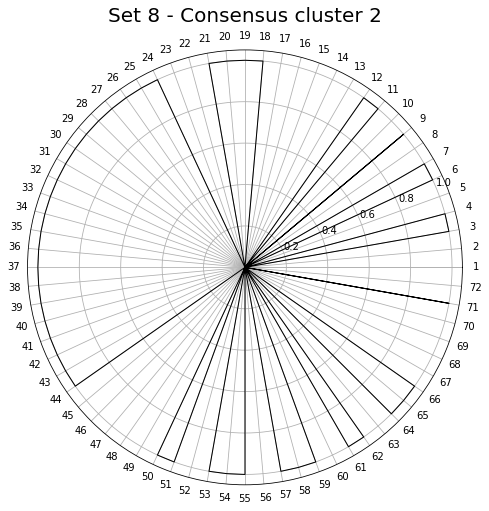

array([1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 0., 1., 1.])
array([0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 0., 0.])


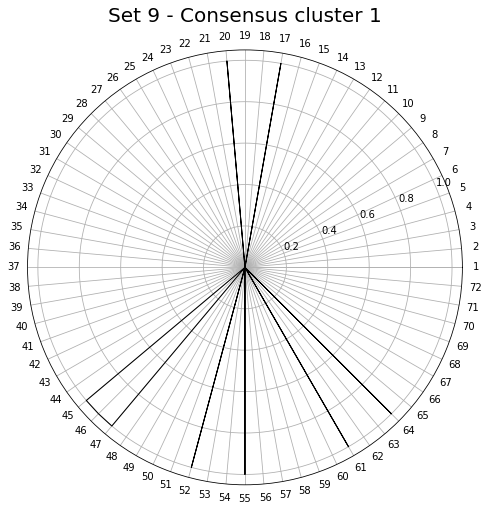

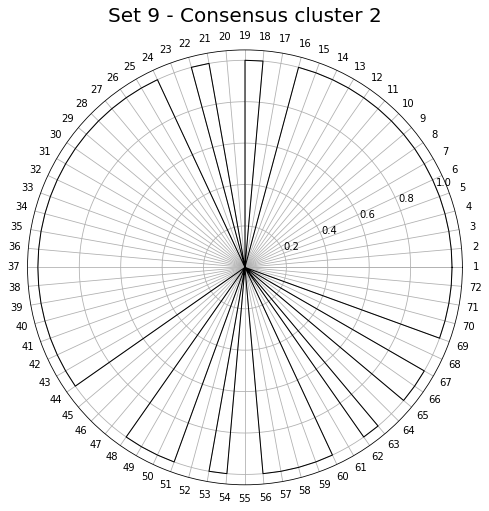

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1.])


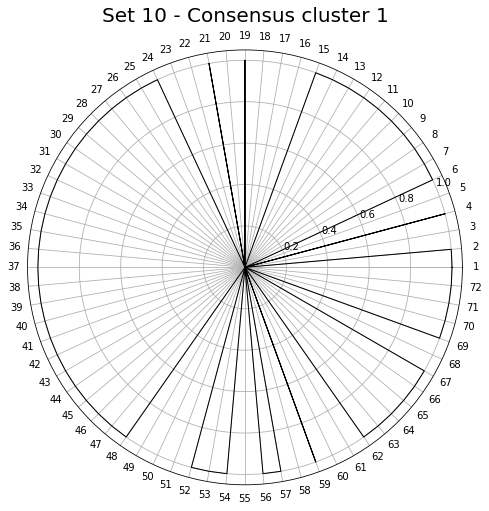

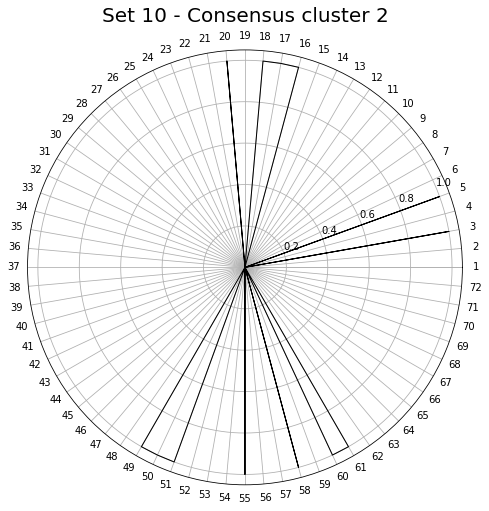

array([1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1.])
array([0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])


In [ ]:
cents=[]
for t, X in enumerate(newXs):
    centroid_of_cluster = []
    #df=pd.read_csv('df.csv').drop(['repo_fullname', 'id'], axis=1).iloc[:,:-2]#.drop(['Repo'], axis=1).iloc[:,:-4]
    #print(df)
    #df=pd.read_csv(url2)
    #df = df.drop(['Repo'], axis=1)
    #for col in df.columns:
    #    df[col] = df[col].apply(clean_currency).astype('float')
    #X=MinMaxScaler().fit_transform(df.fillna(0).to_numpy())
    #X=df.fillna(0).to_numpy()
    #X=df.drop(['Repo'], axis=1).to_numpy()[:,:-7]

    labels = label_ces[t]
    #print(X)
    from sklearn.preprocessing import StandardScaler, MinMaxScaler
    if True:
        for i in set(labels):
            #if i!=-1:
            points_of_cluster = X.iloc[:,:-(len(X.columns)-len(df.columns))].to_numpy()[labels==i,:]
            #print(len(X[labels==i,:]))
            #print(points_of_cluster)
            centroid_of_cluster.append(np.mean(points_of_cluster, axis=0))
        #print(points_of_cluster.shape)
        for i in range(2):
            # #############################################################################
            # Plot result
            import matplotlib.pyplot as plt

            # Black removed and is used for noise instead.
            unique_labels = set(labels)
            colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

                

            #plt.title("Estimated number of clusters: %d" % n_clusters_)

            centers = centroid_of_cluster
            categories=range(1,73)#df.columns
            lst = []
            lstkst = []
            for j in range(len(centers)):
                lst = centers[j].tolist()
                lst.append(centers[j][0])
                lstkst.append(lst)
            #print(lstkst)   
            centers = np.array([np.array(xi) for xi in lstkst])

            scaler = MinMaxScaler().fit(centers)
            centers = scaler.transform(centers)
            label_loc = np.linspace(start=0, stop=2 * np.pi, num=72+1)
            #print(centers[0])
            plt.figure(figsize=(8, 8))
            plt.subplot(polar=True)
            
            #plt.plot(label_loc, centers[0], label='Cluster 1 prototype', color='Black', linewidth=1.0)
            plt.plot(label_loc, centers[i], label='Cluster {} prototype'.format(i+1), color='Black', linewidth=1.0)
            #plt.plot(label_loc, centers[2], label='Cluster 2 prototype', color='Black', linewidth=1.0)
            
            plt.title('Set {} - Consensus cluster {}'.format(t+1,i+1), size=20)
            lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
            #plt.legend(loc=8)
            plt.savefig('{}.pdf'.format('consensus{}{}'.format(t, i+1)))
            plt.show()   
            #maxx=[0]*81
            #minn=[10]*81
            #stdevs=[0]*81
            #for i in categories:
            #    devs=[]
            #    for j in range(len(centers)):
            #        maxx[i-1]=max(centers[j][i-1],maxx[i-1])
            #        minn[i-1]=min(centers[j][i-1],minn[i-1])
            #        devs.append(centers[j][i-1])
            #    stdevs[i-1]=np.std(devs)
            #print(stdevs)
            #stdevs[i]=np.std(devs)
            #maxx[i]=max(centers[j][i],maxx[i])
            #minn[i]=min(centers[j][i],minn[i])  
        for cen in centers:
            print(repr(cen))
        centold=centers
        cents.append(centold)

In [ ]:
!pip install pulp

     |████████████████████████████████| 14.2 MB 983 kB/s 


In [ ]:
upcents=[]
for i in range(len(cents)):
    upcents.append(np.array([cents[i][0][:-1], cents[i][1][:-1]]))
upcents[0]    

array([[5.01178755e-02, 5.08720930e-02, 2.22317047e-01, 3.05232558e-01,
        5.20544333e-02, 2.15016611e-01, 4.98324924e-01, 3.06639413e-01,
        2.30443975e-01, 6.35736141e-02, 4.23640509e-02, 1.65805340e-01,
        3.06279697e-02, 3.77007912e-02, 3.80026157e-02, 5.84815321e-02,
        9.64685616e-02, 6.61263801e-01, 1.17131115e-01, 1.39093393e-01,
        1.74418605e-01, 2.32558140e-02, 0.00000000e+00, 9.53488372e-01,
        5.25072674e-01, 2.39089560e-01, 1.09165527e-01, 1.41257537e-01,
        2.23533495e-01, 2.74026338e-01, 5.46633635e-02, 7.36434109e-02,
        1.96382429e-01, 8.60465116e-01, 7.21899225e-02, 4.65116279e-02,
        6.78907561e-02, 1.11023519e-01, 2.90697674e-02, 3.78817596e-01,
        2.98097252e-01, 4.53488372e-01, 1.17830400e-01, 7.40198614e-02,
        0.00000000e+00, 5.77151587e-04, 1.39874465e-03, 1.05854050e-01,
        1.02758248e-01, 8.83720930e-02, 8.83720930e-02, 1.15430317e-03,
        4.63967399e-01, 1.67958656e-01, 5.52802135e-02, 3.604651

In [ ]:
#for i in range(len(cents)):
#    cents[i]=scalers[i].inverse_transform(cents[i])

In [ ]:
#vecs=[]
#for cent in cents:
#    vecs.append(cent[0])
#    vecs.append(cent[1])
#scaler_new=MinMaxScaler().fit(np.array(vecs))    

#for i in range(len(cents)):
#    cents[i]=scaler_new.transform(cents[i])    

10


/usr/local/lib/python3.7/dist-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


[[0.         1.         1.         0.         1.         1.
  0.         1.         1.         0.         0.0266841 ]
 [1.         0.         0.         1.         0.         0.
  1.         0.         0.         1.         0.04308491]]
whhr (array([0, 1]), array([1, 0]), array([1, 0]), array([0, 1]), array([1, 0]), array([1, 0]), array([0, 1]), array([1, 0]), array([1, 0]), array([0, 1]))


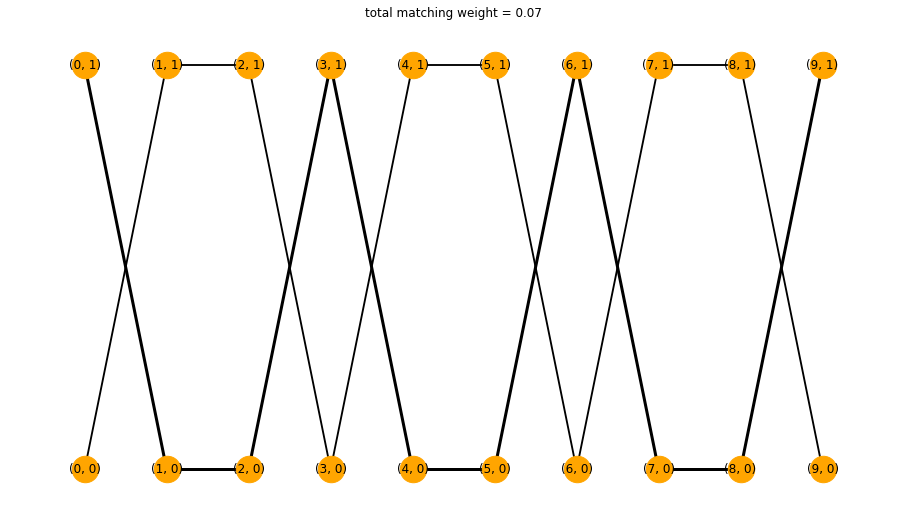

In [ ]:
# import modules
import copy
import itertools
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pulp
from scipy.spatial import distance

# number of people (or items) per group (or dimension)
dims = [2,2,2,2,2,2,2,2,2,2]

# dummy weight array
# (one weight for each combination of people, with one from each group)
np.random.seed(0)
#db21=np.delete(db21, (db21.shape[0]-1), axis=0)
models = np.array(upcents)
print(len(models))

weights = np.empty(dims) #np.random.rand(*dims)

for i in range(len(models[0])):
    for j in range(len(models[1])):
        for k in range(len(models[2])):
            for e in range(len(models[3])):
                for r in range(len(models[4])):
                    for t in range(len(models[5])):
                        for y in range(len(models[6])):
                            for u in range(len(models[7])):
                                for o in range(len(models[8])):
                                    for p in range(len(models[9])):
                                        weights[i][j][k][e][r][t][y][u][o][p]=\
                        1.0/(np.linalg.norm(models[0][i]-models[1][j])+\
                             np.linalg.norm(models[0][i]-models[2][k])+\
                             np.linalg.norm(models[0][i]-models[3][e])+\
                             np.linalg.norm(models[0][i]-models[4][r])+\
                             np.linalg.norm(models[0][i]-models[5][t])+\
                             np.linalg.norm(models[0][i]-models[6][y])+\
                             np.linalg.norm(models[0][i]-models[7][u])+\
                             np.linalg.norm(models[0][i]-models[8][o])+\
                             np.linalg.norm(models[0][i]-models[9][p])+\
                             np.linalg.norm(models[1][j]-models[2][k])+\
                             np.linalg.norm(models[1][j]-models[3][e])+\
                             np.linalg.norm(models[1][j]-models[4][r])+\
                             np.linalg.norm(models[1][j]-models[5][t])+\
                             np.linalg.norm(models[1][j]-models[6][y])+\
                             np.linalg.norm(models[1][j]-models[7][u])+\
                             np.linalg.norm(models[1][j]-models[8][o])+\
                             np.linalg.norm(models[1][j]-models[9][p])+\
                             np.linalg.norm(models[2][k]-models[3][e])+\
                             np.linalg.norm(models[2][k]-models[4][r])+\
                             np.linalg.norm(models[2][k]-models[5][t])+\
                             np.linalg.norm(models[2][k]-models[6][y])+\
                             np.linalg.norm(models[2][k]-models[7][u])+\
                             np.linalg.norm(models[2][k]-models[8][o])+\
                             np.linalg.norm(models[2][k]-models[9][p])+\
                             np.linalg.norm(models[3][e]-models[4][r])+\
                             np.linalg.norm(models[3][e]-models[5][t])+\
                             np.linalg.norm(models[3][e]-models[6][y])+\
                             np.linalg.norm(models[3][e]-models[7][u])+\
                             np.linalg.norm(models[3][e]-models[8][o])+\
                             np.linalg.norm(models[3][e]-models[9][p])+\
                             np.linalg.norm(models[4][r]-models[5][t])+\
                             np.linalg.norm(models[4][r]-models[6][y])+\
                             np.linalg.norm(models[4][r]-models[7][u])+\
                             np.linalg.norm(models[4][r]-models[8][o])+\
                             np.linalg.norm(models[4][r]-models[9][p])+\
                             np.linalg.norm(models[5][t]-models[6][y])+\
                             np.linalg.norm(models[5][t]-models[7][u])+\
                             np.linalg.norm(models[5][t]-models[8][o])+\
                             np.linalg.norm(models[5][t]-models[9][p])+\
                             np.linalg.norm(models[6][y]-models[7][u])+\
                             np.linalg.norm(models[6][y]-models[8][o])+\
                             np.linalg.norm(models[6][y]-models[9][p])+\
                             np.linalg.norm(models[7][u]-models[8][o])+\
                             np.linalg.norm(models[7][u]-models[9][p])+\
                             np.linalg.norm(models[8][o]-models[9][p])
                             )
        
#print("weights:", weights[0][0][0], "weights printed")
# implement and solve problem
def maximum_npartite_matching(weights):

    # get dimensions from weights array
    dims = weights.shape

    # prepare auxiliary variables
    grid = [range(dim) for dim in dims]
    varx = itertools.product(*grid)

    # initialize variables
    xxx = pulp.LpVariable.dicts('xxx', varx, cat=pulp.LpBinary)

    # initialize optimization problem
    problem = pulp.LpProblem('nD matching', pulp.LpMaximize)

    # set objective
    # sum_ijk... c_ijk... x_ijk...
    problem += pulp.lpSum([weights[iii] * xxx[iii] for iii in xxx])

    # set constraints
    # sum_i x_ijk... <= 1
    # sum_j x_ijk... <= 1
    # sum...
    for idi, dim in enumerate(dims):
        for idv in range(dim):
            gric = copy.deepcopy(grid)
            gric[idi] = [idv]
            vary = itertools.product(*gric)
            problem += pulp.lpSum(xxx[iii] for iii in vary) <= 1

    # solve problem
    problem.solve() #mixed integer programming solver - coin-or branch-and-cut

    # write binary variables to array
    rex = weights.copy() * 0
    for iii in xxx:
        rex[iii] = xxx[iii].value()

    # find optimal matching = path and path weights
    whr = np.where(rex)
    paths = np.array(whr).T
    pathw = weights[whr]

    # print paths (n columns) and corresponding weights (last column)
    result = np.vstack([paths.T, pathw]).T
    print(result)

    return whr

# run matching
whr = maximum_npartite_matching(weights)

# define function for plotting results as network
def plot_results(weights, whr):

    # create list of node positions for plotting and labeling
    pon = [(idi, idv) for idi, dim in enumerate(dims) for idv in range(dim)]
    # convert to dictionary
    pos = {tuple(poi): poi for poi in pon}

    # create empty graph
    graph = nx.empty_graph(len(pos))
    # rename labels according to plot position
    mapping = {idp: tuple(poi) for idp, poi in enumerate(pon)}
    graph = nx.relabel_nodes(graph, mapping)

    # set edges from maximum n-partite matching
    edges = []
    # loop over paths
    for whi in np.array(whr).T:
        weight = weights[tuple(np.array(whj) for whj in whi)]
        pairs = list(zip(whi[:-1], whi[1:]))
        # loop over consecutive node pairs along path
        for idp, (id0, id1) in enumerate(pairs):
            edges.append(((idp+0, id0), (idp+1, id1), {'weight': weight}))
    graph.add_edges_from(edges)

    # set path weights as edge widths for plotting
    width = np.array([edge['weight'] for id0, id1, edge in graph.edges(data=True)])
    width = 3.0*width/max(width)

    #plot network
    fig = plt.figure(figsize=(16, 9))
    obj = weights[whr].sum()
    plt.title('total matching weight = %.2f' % obj)
    nx.draw_networkx(graph, pos=pos, width=width, node_color='orange', node_size=700)
    plt.axis('off')

    return graph, pos

# run plotting
graph, pos = plot_results(weights, whr)
print("whhr", whr)

In [ ]:
from scipy.spatial.distance import pdist
import xarray as xr
zeros=[]
ones=[]
for i in range(len(whr)):
    zeros.append(upcents[i][whr[i][0]]-np.mean(cents[i][whr[i][0]]))
    ones.append(upcents[i][whr[i][1]]-np.mean(cents[i][whr[i][1]]))
xr.apply_ufunc(pdist, zeros)
print(max(pdist(zeros, 'cosine')),
max(pdist(ones, 'cosine')))
print(max(pdist(zeros)),
max(pdist(ones)))

0.1641951824922201 0.12802290229361868
1.0618973081216276 0.7639070977599622


In [ ]:
upcentss=[]
for i in range(len(cents)):
    upcentss.append(scalers[i].inverse_transform(upcents[i]))

[array([1.20069582e+03, 5.09088795e+00, 5.07214097e+01, 2.59814764e+00,
       8.61934984e+01, 1.19034796e+02, 2.42057877e+03, 1.08543661e+03,
       1.00097063e+01, 2.04759733e+04, 8.06242222e+03, 8.23989490e+00,
       1.27211605e+03, 1.67763366e+01, 9.93560673e+01, 3.86582210e+00,
       2.31291274e+00, 6.43297436e+01, 6.49066472e+02, 2.48762647e+02,
       1.05389055e+00, 1.86477889e-02, 0.00000000e+00, 9.51811422e-01,
       3.28265841e+01, 5.36500920e+01, 1.07088283e+01, 2.98124934e+00,
       1.24280819e+01, 1.16339591e+02, 8.90792606e+02, 6.85577733e-01,
       2.33287868e+00, 8.99269301e-01, 4.48288873e+00, 8.55117488e-02,
       6.65491516e+02, 8.95567052e+01, 2.29736263e-01, 3.23680418e+01,
       3.12146527e+00, 1.05429643e+00, 1.14509248e+03, 2.12340025e+02,
       7.75686658e-02, 2.13477268e+03, 5.59182455e+05, 4.27432554e+01,
       3.56555850e+00, 2.83655404e+00, 2.83655404e+00, 8.51142391e+03,
       2.43494355e+03, 3.58060574e+00, 2.03956071e+00, 2.08824306e+00,
     

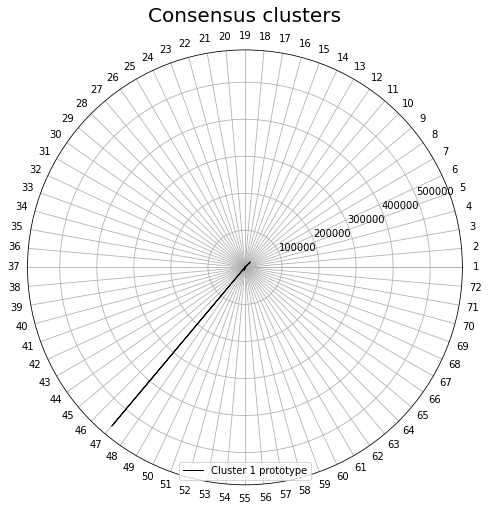

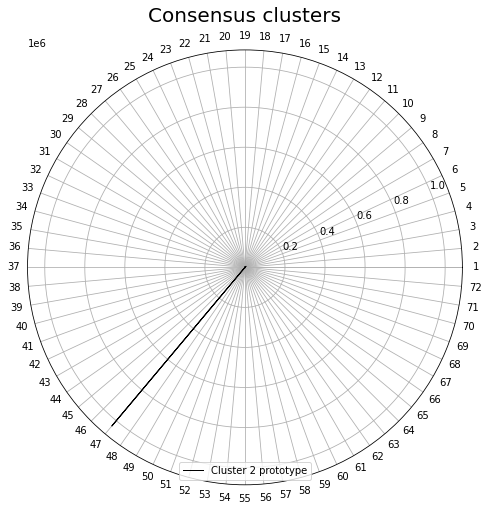

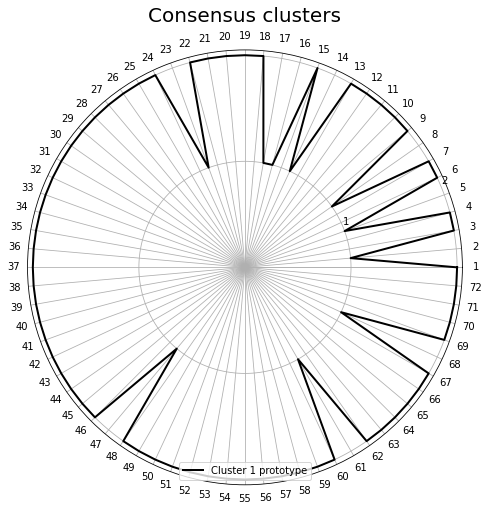

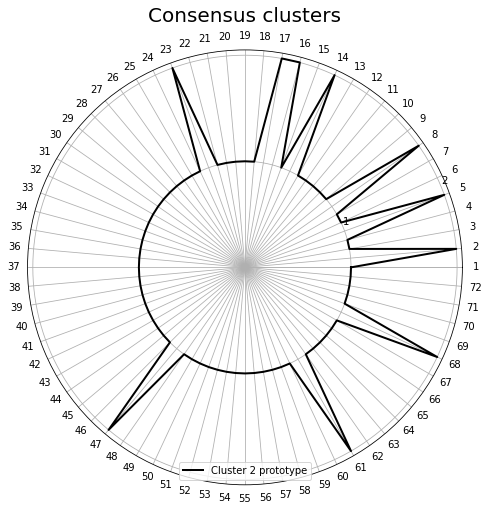

In [ ]:
from scipy import spatial
clus=[[],[]]
#clus2=[]
for i, newX in enumerate(newXs):
    clus[0].append(upcentss[i][whr[i][0],:])
    clus[1].append(upcentss[i][whr[i][1],:])

prots=[]
for cl in clus:
        #if i!=-1:
    points_of_cluster = np.array(cl)
        #print(len(X[labels==i,:]))
        #print(points_of_cluster)
    prots.append(np.mean(points_of_cluster, axis=0))
print(prots)
from sklearn.preprocessing import StandardScaler, MinMaxScaler

for i, newX in enumerate(newXs):
    #X=Scaler.transform()
    tree = spatial.KDTree(dftrue.iloc[:,1:].to_numpy())    
    cl1 = tree.query(prots[0])[1]
    cl2 = tree.query(prots[1])[1]
    #cl3 = tree.query(centold[2,:-1])[1]
    #cl4 = tree.query(centold[3,:-1])[1]
    print(cl1,cl2)
    champ1=dftrue.iloc[cl1,0]
    champ2=dftrue.iloc[cl2,0]
print(champ1, champ2)

import matplotlib.pyplot as plt
if True:
    if True:
        centers = prots#centroid_of_cluster
        categories=range(1,73)#df.columns
        
        for i in range(2):
            # #############################################################################
            # Plot result
            import matplotlib.pyplot as plt

            # Black removed and is used for noise instead.
            unique_labels = set(labels)
            colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

                

            #plt.title("Estimated number of clusters: %d" % n_clusters_)

            centers = prots.copy()
            categories=range(1,73)#df.columns
            lst = []
            lstkst = []
            for j in range(len(centers)):
                lst = centers[j].tolist()
                lst.append(centers[j][0])
                lstkst.append(lst)
            #print(lstkst)    
            centers = np.array([np.array(xi) for xi in lstkst])
            scaler = MinMaxScaler().fit(centers)
            #centers = scaler.transform(centers)
            label_loc = np.linspace(start=0, stop=2 * np.pi, num=72+1)
            #print(centers[0])
            plt.figure(figsize=(8, 8))
            plt.subplot(polar=True)
            
            #plt.plot(label_loc, centers[0], label='Cluster 1 prototype', color='Black', linewidth=1.0)
            plt.plot(label_loc, centers[i], label='Cluster {} prototype'.format(i+1), color='Black', linewidth=1.0)
            #plt.plot(label_loc, centers[2], label='Cluster 2 prototype', color='Black', linewidth=1.0)

            plt.title('Consensus clusters', size=20)
            lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
            plt.legend(loc=8)
            plt.savefig('{}.pdf'.format('consensus{}{}'.format('final', i+1)))
            plt.show()  
        centold=centers.copy()

        protsdf=pd.DataFrame(centold.T)
#print(protsdf)
        protsdf = protsdf.rank(method ='dense', axis = 1, ascending = True).astype(int)#.replace([1,2,3], ['small', 'medium', 'large'])
        centers=protsdf.to_numpy().T
        centers
        for i in range(2):
        # #############################################################################
            # Plot result
            import matplotlib.pyplot as plt
            #centers_0 = pd.Categorical(pd.DataFrame(centers[0]).iloc[:,0], categories = ['small', 'medium', 'large'] , ordered = True)
            categories=range(1,73)#df.columns

            label_loc = np.linspace(start=0, stop=2 * np.pi, num=72+1)
            #print(centers[0])
            plt.figure(figsize=(8, 8))
            plt.subplot(polar=True)
            #for i in highlight:
            #    plt.axvline(label_loc[i-1], color='red', linewidth=1.0)
            #plt.plot(label_loc, centers[0], label='Cluster 1 prototype', linewidth=2.0)
            plt.plot(label_loc, centers[i], label='Cluster {} prototype'.format(i+1), color='Black', linewidth=2.0)
            #plt.plot(label_loc, centers[2], label='Cluster 2 prototype', color='Orange', linewidth=2.0)
            
            plt.title('Consensus clusters', size=20)
            lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
            plt.rgrids([1,2])#, ['small', 'medium1', 'medium2', 'large'])
            plt.legend(loc=8)
            plt.savefig('{}.pdf'.format('consensuscat{}'.format(i+1)))
            plt.show()   
            #print(centers)     

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from itertools import combinations
def get_clusters_groups(df, label_column ="labels" ):
  clusters = []
  for _ , group in df.groupby(label_column):
    clusters.append(group)
  
  return clusters

def t_test_clustering_method(clusters, number_of_columns=81, alpha=0.05):
  result = []
  number_of_clusters = len(clusters)
  for metric in range (1, number_of_columns): # 1st column is not included since it's the name of the repo
    row = []
    for first_cluster_to_compare in range(number_of_clusters):
      for second_cluster_to_compare in range(first_cluster_to_compare + 1, number_of_clusters): # pairwise comparison between clusters
        row.append(True if stats.ttest_ind(clusters[first_cluster_to_compare].iloc[:, metric], clusters[second_cluster_to_compare].iloc[:, metric])[1] > alpha else False)
    result.append(row)
  return result

In [ ]:
#import pandas as pd
#newXs=[]
#for i in range(10):
#    newXs.append(pd.read_csv('true{}'.format(i)))

#df=pd.read_csv('truedf.csv')    

In [ ]:
alpha = 0.05
number_of_columns = 73
ds = []
print(newX.iloc[:,:-(len(newX.columns)-len(df.columns))+1])
for newX in newXs:
    #d = []
    for clustering_method in newX.iloc[:,:-(len(newX.columns)-len(df.columns))+1].columns[-1:]:
        clusters = get_clusters_groups(newX.iloc[:,:-(len(newX.columns)-len(df.columns))+1], clustering_method)
        number_of_clusters = len(clusters)

        #print(clustering_method)
        print(f'Number of clusters : {len(clusters)}')

        temp_result = t_test_clustering_method(clusters, 73, 0.05)
        result_df = pd.DataFrame(data=temp_result, index=newX.columns[:-(len(newX.columns)-len(df.columns))], # All metric columns
                                columns=[f"Cluster {i[0]} vs Cluster {i[1]}" for i in combinations(range(number_of_clusters), 2)])

        metrics_to_remove = np.array(result_df.index)[np.array(result_df.sum(1)) == len(result_df.columns) ]
        print(f'Metrics to remove : {len(metrics_to_remove)}')
        print(f'Metrics left : {len(np.array(result_df.index)) - len(metrics_to_remove)}') 
        print("To remove : \n", metrics_to_remove)
        #d.append(metrics_to_remove)
        #print('d',d)

    #result_to_remove = set(d[0]).intersection(*d[1:])
    #print(result_to_remove)
    ds.append(metrics_to_remove.flatten())

result_to_remove = set(ds[0]).intersection(*ds[1:])    
print("To remove : \n", result_to_remove)

In [ ]:
from scipy import spatial
champs1=[]
champs2=[]
#dftrue=pd.read_csv('dfture.csv')
loc=0
for i, newX in enumerate(newXs):
    #X=Scaler.transform()
    tree = spatial.KDTree(newX.iloc[:,:-(len(newX.columns)-len(df.columns))].to_numpy())    
    cl1 = tree.query(upcents[i][whr[i][0],:])[1]
    cl2 = tree.query(upcents[i][whr[i][1],:])[1]
    #cl3 = tree.query(centold[2,:-1])[1]
    #cl4 = tree.query(centold[3,:-1])[1]
    print(cl1,cl2)
    if i>0:
        loc+=len(newXs[i-1])
    champs1.append(dftrue.iloc[cl1+loc,0])
    champs2.append(dftrue.iloc[cl2+loc,0])
    #projs = tree.query(cl1)[1]    
    #print(projs)
    #origin_df = pd.read_csv(url2)
    #print(origin_df.shape)
    #new_df = origin_df.iloc[projs]

    #new_df=new_df.drop_duplicates()
    #or_prots = new_df[:4]
    #print(or_prots)
print(champs1)
print(champs2)    